# k-means

In [24]:
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import mglearn
%matplotlib inline

In [25]:
# 데이터 생성
np.random.seed(1) 
N=100
K=3
T3 = np.zeros((N,3),dtype=np.uint8)
X = np.zeros((N,2))
X_range0 = [-3,3]
X_range1 = [-3,3]
X_col = [ 'cornflowerblue', 'black', 'white']
Mu = np.array([[-0.5,-0.5],[0.5,1.0],[1,-0.5]]) # 분포 중심
Sig = np.array([[0.7,0.7],[0.8,0.3],[0.3,0.8]]) # 분포의 분산
Pi = np.array([0.4,0.8,1]) # 누적 확률

for n in range(N):
    wk = np.random.rand()
    for k in range(N):
        if wk < Pi[k]:
            T3[n,k] = 1
            break
    for k in range(2):
        X[n,k] = (np.random.randn()*Sig[T3[n,:]==1,k] + Mu[T3[n,:]==1,k])

In [26]:
# 데이터 그리기(파악)
def show_data(x):
    plt.plot(x[:,0],x[:,1],linestyle='none',
            marker ='o',markeredgecolor='black',
                markersize =6, alpha = 0.8, color ='gray')
    plt.grid(True)

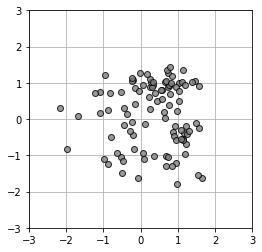

In [27]:
plt.figure(1, figsize=(4,4))
show_data(X)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()
np.savez('data_ch9.npz', X=X, X_range0=X_range0, X_range1=X_range1)

In [28]:
Mu = np.array([[-2,1],[-2,0],[-2,-1]]) # 임의로 중심 설정
R = np.c_[np.ones((N,1), dtype=int), np.zeros((N,2), dtype=int)]
 # R의 첫 행은 1, 두세번째 행은 0으로 하여 모든 데이터가 1번 클러스터에 포함이라고 초기화


In [29]:
%matplotlib inline
# 데이터, mu,그림
def show_prm(x,r,mu,col):
    for k in range(K):
        plt.plot(x[r[:,k]==1,0], x[r[:,k]==1,1],
                marker ='o',
                markerfacecolor=X_col[k], markeredgecolor='k',
                markersize =6, alpha = 0.5, linestyle='none')
        plt.plot(mu[k,0], mu[k,1], marker = '*',
                markerfacecolor=X_col[k], markeredgecolor='k',
                markersize =15, markeredgewidth=1)
        plt.xlim(X_range0)
        plt.ylim(X_range1)
        plt.grid(True)


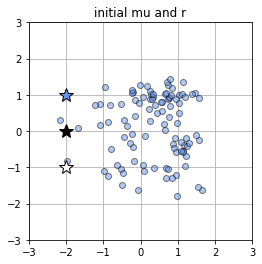

In [30]:
plt.figure(figsize = (4,4))
R = np.c_[np.ones((N,1)),np.zeros((N,2))]
show_prm(X,R,Mu,X_col)
plt.title('initial mu and r')
plt.show()

In [31]:
Mu

array([[-2,  1],
       [-2,  0],
       [-2, -1]])

In [32]:
def step1_kmeans(x0,x1,mu): #(데이터 0행, 1행, 중심)
    N = len(x0)
    r = np.zeros((N,K)) # 100x3
    for n in range(N):
        wk= np.zeros(K) # 각 데이터마다 1x3 배열 생성()
        for k in range(K):
            wk[k] = (x0[n] - mu[k,0])**2 + (x1[n] -mu[k,1])**2  # 거리 계산
        r[n, np.argmin(wk)] = 1 # np.argmin(배열): 가장 작은 원소를 가진 열의 인덱스 반환
    return r

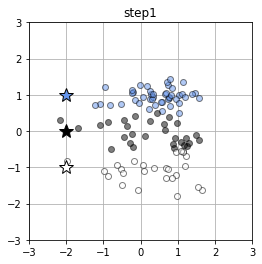

In [33]:
plt.figure(figsize = (4,4))
R = step1_kmeans(X[:,0],X[:,1],Mu)
show_prm(X,R,Mu,X_col)
plt.title('step1')
plt.show()

In [34]:
def step2_kmeans(x0,x1,r):
    mu = np.zeros((K,2))
    for k in range(K):
        mu[k,0] = np.sum(r[:,k] * x0) / np.sum(r[:,k])
        mu[k,1] = np.sum(r[:,k] * x1) / np.sum(r[:,k])
    return mu

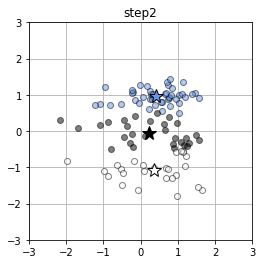

In [35]:
plt.figure(figsize = (4,4))
Mu = step2_kmeans(X[:,0],X[:,1],R)
show_prm(X,R,Mu,X_col)
plt.title('step2')
plt.show()

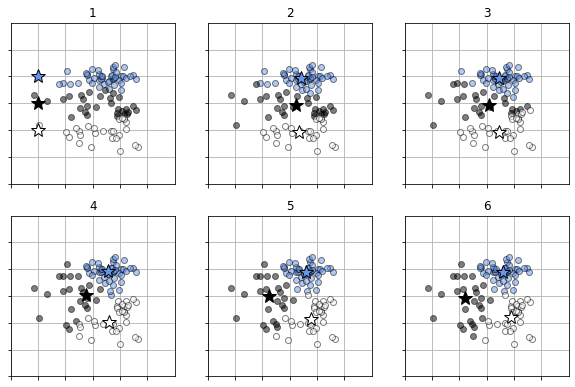

In [36]:
plt.figure(1, figsize=(10,6.5))
Mu = np.array([[-2,1],[-2,0],[-2,-1]])
max_it = 6 # 반복횟수
for it in range(0,max_it):
    plt.subplot(2,3,it +1)
    R = step1_kmeans(X[:,0],X[:,1],Mu)
    show_prm(X,R,Mu,X_col)
    plt.title('{0:d}'.format(it+1))
    plt.xticks(range(X_range0[0],X_range0[1]),"")
    plt.yticks(range(X_range1[0],X_range1[1]),"")
    Mu = step2_kmeans(X[:,0],X[:,1],R)
plt.show()

In [37]:
# 초기값의 왜곡척도 구하기
def distortion_measure(x0,x1,r,mu):
    #입력은 2차원으로 제한한다.
    N =len(x0)
    J = 0
    for n in range(N):
        for k in range(K):
            J = J + r[n,k] * ((x0[n] - mu[k,0])**2 + (x1[n] - mu[k,1])**2)
    return J

In [38]:
Mu = np.array([[-2,1],[-2,0],[-2,-1]]) # 임의로 중심 설정
R = np.c_[np.ones((N,1), dtype=int), np.zeros((N,2), dtype=int)]
distortion_measure(X[:,0],X[:,1],R,Mu)

771.7091170334878

[627.54  73.39  70.39  57.59  48.31  47.28  46.86  46.86  46.86  46.86]


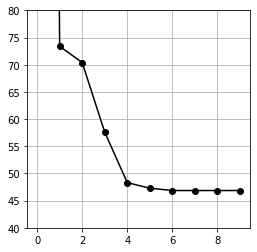

In [39]:
N = X.shape[0]
K=3
Mu = np.array([[-2,1],[-2,0],[-2,-1]]) 
R = np.c_[np.ones((N,1), dtype=int), np.zeros((N,2), dtype=int)]
max_it = 10
it = 0
DM = np.zeros(max_it) # 왜곡 척도 계산 결과를 넣는다
for it in range(0,max_it): # k-means 기법
        R = step1_kmeans(X[:,0],X[:,1],Mu)
        DM[it] = distortion_measure(X[:,0],X[:,1],R,Mu) # 왜곡 척도
        Mu = step2_kmeans(X[:,0],X[:,1],R)
print(np.round(DM,2))
plt.figure(2, figsize=(4,4))
plt.plot(DM,color = 'black', linestyle = '-', marker='o')
plt.ylim(40,80)
plt.grid(True)
plt.show()

In [68]:
DM

array([627.53802448,  73.69963989,  73.56327846,  73.56327846,
        73.56327846,  73.56327846,  73.56327846,  73.56327846,
        73.56327846,  73.56327846])